## Impact of handwashing on Mortality rates

We will analyze the data to determine whether handwashing had any impact on the deaths of women giving birth during the early 1840s at the Vienna General Hospital. 

### 1. Reading the dataset

The table below shows the number of women giving birth at the two clinics (clinic 1 & clinic 2) between the years 1841 to 1846 at the Vienna General Hospital. 

In [1]:
#Import modules
import pandas as pd
import numpy as np

#Read yearly deaths by clinic data into yearly variable
yearly_data = pd.read_csv("Data/clinic_deaths_yearly.csv")

#Print the first few rows of yearly_data
print(yearly_data.head())

   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1


### 2. Checking the Mortality rates

From the above table we can see that many women died while giving birth. To analyze the proportion of deaths at Clinic 1 & 2, we need to look at the number of deaths in relation to the total number of women who gave birth at the clinic. If we divide the number of deaths by the total number of births and then multiply by 100, we can calculate the percentage of deaths. For example, if there were 100 births and 5 deaths, the proportion of deaths would be 5%.

In [2]:
#Calculate the percentage of deaths
yearly_data["proportion_deaths"]=round(yearly_data["deaths"]/yearly_data["births"]*100,2)

#Clinic_1 and Clinic_2 are variables that store dataframes extracted from the yearly_data dataframe based on the clinic names.
clinic_1 = yearly_data[yearly_data['clinic']=='clinic 1']
clinic_2 = yearly_data[yearly_data['clinic']=='clinic 2']


#Print out clinic_1 and clinic_2
print(clinic_1)
print("\n")
print(clinic_2)


   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1               7.81
1  1842    3287     518  clinic 1              15.76
2  1843    3060     274  clinic 1               8.95
3  1844    3157     260  clinic 1               8.24
4  1845    3492     241  clinic 1               6.90
5  1846    4010     459  clinic 1              11.45


    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2               3.52
7   1842    2659     202  clinic 2               7.60
8   1843    2739     164  clinic 2               5.99
9   1844    2956      68  clinic 2               2.30
10  1845    3241      66  clinic 2               2.04
11  1846    3754     105  clinic 2               2.80


### 3. Visualizing the Mortality rates

If we plot the proportion of deaths on a graph, we can see an interesting pattern.

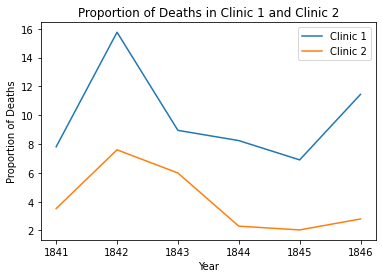

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot line graph for clinic_1 dataframe
sns.lineplot(x='year', y='proportion_deaths', data=clinic_1, label="Clinic 1")

# Plot line graph for clinic_2 dataframe
sns.lineplot(x='year', y='proportion_deaths', data=clinic_2, label="Clinic 2")

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Proportion of Deaths')

# Set the title of the plot
plt.title('Proportion of Deaths in Clinic 1 and Clinic 2')

# Show the plot
plt.show()

### 4.Handwashing protocol

There seems to be clearly a difference in the mortality rates between Clinic 1 and Clinic 2. Proportion of Deaths in Clinic 2 is much higher than Clinic two consistently for so many years.

In the 19th century, before the discovery of bacteria, it was not well understood how diseases spread. Dr. Semmelweis observed that the mortality rate at Clininc 2 where midwives worked was much higher than at the Clinic 1 where medical students worked. He hypothesized that medical students, who also performed autopsies, may have been unknowingly transmitting infection to the women they were treating in the maternity ward.

To test his hypothesis, Dr. Semmelweis implemented a strict hand-washing protocol for medical students and other staff who worked in the maternity ward.

We will be analysing whether the hand-washing protocol had any significant impact on the mortality rates.

In [4]:
# Read births_deaths_montly dataset into monthly_data variable 
monthly_data = pd.read_csv("Data/births_deaths_monthly.csv", parse_dates=['date'])

# Calculate the percentage of deaths
monthly_data["proportion_deaths"]=round(monthly_data["deaths"]/monthly_data["births"]*100,2)

#Print the first few rows of monthly_data
print(monthly_data.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37              14.57
1 1841-02-01     239      18               7.53
2 1841-03-01     277      12               4.33
3 1841-04-01     255       4               1.57
4 1841-05-01     255       2               0.78


### 5. The effect of handwashing

Plotting the data of the monthly_data dataframe will help us understand how the proportion of deaths changed overtime. Inorder to highlight the difference before and after started the handwashing protcol,we will be using different colors in the plot.

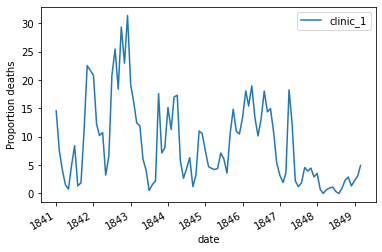

In [5]:
# Plot monthly proportion of deaths
Monthly_Prop=monthly_data.plot(x='date',y='proportion_deaths',label='clinic_1', ylabel='Proportion deaths')

### 6. Highlighting the effect of handwashing


From the above graph, we can see that from mid of 1847 the proportions of deaths have been drastically reduced. That also happens to the time period when Dr.Semmelweis had made the handwashing mandatory. 

<AxesSubplot:xlabel='Year', ylabel='Proportion_deaths'>

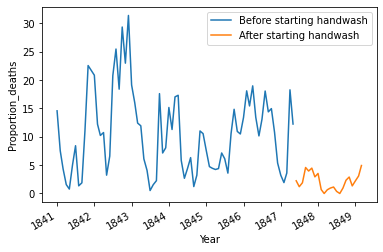

In [6]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly_data[monthly_data["date"]<handwashing_start]
after_washing =  monthly_data[monthly_data["date"]>=handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
Monthly_Prop=before_washing.plot(x='date',y='proportion_deaths', label='Before starting handwash')
after_washing.plot(x='date',y='proportion_deaths',ax=Monthly_Prop, label='After starting handwash', ylabel="Proportion_deaths", xlabel="Year")

### 7. More handwashing = fewer deaths?

How much did it reduce the monthly proportion of deaths on average?
Lets calculate the difference in means between the proportion of deaths before and after handwashing was introduced.

In [7]:
#Extract the proportion of deaths before handwashing from the before_washing data and store it in the before_proportion variable.
before_proportion = before_washing['proportion_deaths']

#Extract the proportion of deaths after handwashing from the after_washing data and store it in the after_proportion variable.
after_proportion = after_washing['proportion_deaths']

#Calculate the difference in mean between the two sets of data
mean_diff = np.mean(after_proportion)-np.mean(before_proportion)

print(mean_diff)

-8.395645933014357


### 8. Performing a Bootstrap analysis.


We can see that implementing the handwashing protocol reduced the proportion of deaths by around 8% points. This mean its reducted on an average from 10% to 2%.

If the difference in mortality rates between Clinic 1 and Clinic 2 is due to differences in hygiene practices, then it may be possible to improve outcomes by implementing better infection control measures in Clinic 2.

Lets look at the confidence interval to see the uncertainity around how much handwashing reduces mortality rates.

A confidence interval is a range of values that is likely to contain the true effect of an intervention (such as handwashing) with a certain degree of confidence. The bootstrap method is a statistical technique for estimating the variability of an estimate by resampling the data.


The below code is a bootstrap analysis of the reduction of deaths due to handwashing

In [8]:
#Calculates 3000 bootstrap samples and appends the mean difference in mortality rates to a list boot_mean_diff.
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1,replace=True)
    boot_after = after_proportion.sample(frac=1,replace=True)
    boot_mean_diff.append( boot_after.mean()-boot_before.mean() )

#Calculates a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -10.123211
0.975    -6.685914
dtype: float64

### 9.Conclusion

So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. This provided strong evidence that handwashing was a simple yet highly effective procedure that could save many lives. 